<a href="https://colab.research.google.com/github/thor4/crypto/blob/main/amm_sims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x * y = k

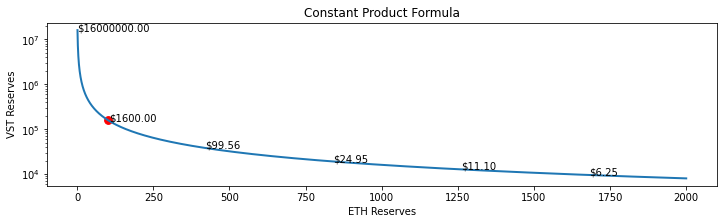

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set initial reserves
x_reserve = 100  # initial reserve of token x (ETH)
y_reserve = 160000  # initial reserve of token y (VST)

# Compute k value
k = x_reserve * y_reserve

# Generate values for token x (ETH) between 1 and 2000
x_values = np.linspace(1, 2000, num=5000)

# Compute corresponding token y (VST) values using the constant product formula
y_values = k / x_values

# Compute ETH price at each x value
eth_prices = y_values / x_values

# Plot the curve using a log scale on the y-axis
fig, ax = plt.subplots(figsize=(12, 3))
ax.set_yscale('log')
ax.plot(x_values, y_values, linewidth=2)

# Highlight the starting price in red
starting_price = y_reserve / x_reserve
ax.scatter(x_reserve, y_reserve, s=60, color='red')

# Annotate the starting price on the plot
ax.annotate(f'${starting_price:.2f}', (x_reserve * 1.05, y_reserve * 0.95))

# Annotate ETH prices at regular intervals along the curve
for i, x in enumerate(x_values[::1000]):
    eth_price = y_values[::1000][i] / x
    ax.annotate(f'${eth_price:.2f}', (x * 1.05, y_values[::1000][i] * 0.95))

# Add labels and title
ax.set_xlabel('ETH Reserves')
ax.set_ylabel('VST Reserves')
ax.set_title('Constant Product Formula')

# Show the plot
plt.show()


x + y = k

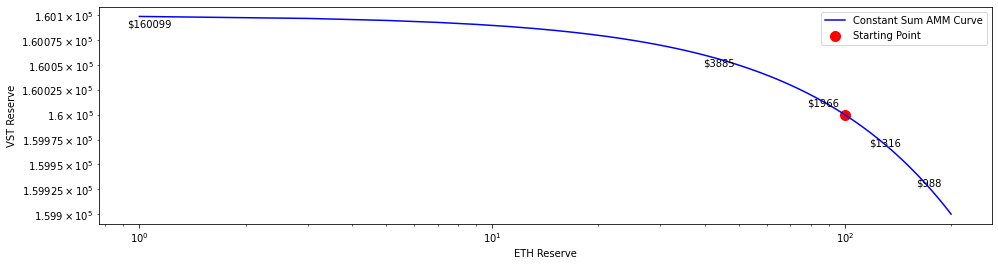

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_reserve = 100
y_reserve = 160000

k = x_reserve + y_reserve

x_values = np.linspace(1, 200, num=100)
y_values = k - x_values

fig, ax = plt.subplots(figsize=(16,4))
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(x_values, y_values, label='Constant Sum AMM Curve', color='blue')

# Add annotations for ETH prices along the curve
eth_prices = [y_values[i] / x_values[i] for i in range(0, len(x_values), 20)]
for i in range(len(eth_prices)):
    ax.annotate(f'${eth_prices[i]:.0f}', (x_values[i*20], y_values[i*20]), 
                textcoords="offset points", xytext=(10,-10), ha='center')

# Highlight starting point
ax.scatter(x_reserve, y_reserve, s=100, color='red', label='Starting Point')

ax.set_xlabel('ETH Reserve')
ax.set_ylabel('VST Reserve')
ax.legend(loc='best')
plt.show()


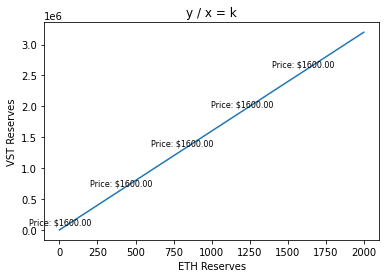

In [7]:
import numpy as np
import matplotlib.pyplot as plt

k = 1600

x_values = np.linspace(0.01, 2000, 1000)
y_values = k * x_values

fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.set_xlabel('ETH Reserves')
ax.set_ylabel('VST Reserves')
ax.set_title('y / x = k')

# Choose 5 x and y values
points = [100, 300, 500, 700, 900]
x_points = x_values[points]
y_points = y_values[points]

# Compute price at each point
prices = y_points / x_points

# Annotate plot with prices
for i in range(len(points)):
    annotation = f"Price: ${prices[i]:.2f}"
    ax.annotate(annotation, (x_points[i], y_points[i]), textcoords="offset points", xytext=(-30,-15), ha='center', fontsize=8)

plt.show()


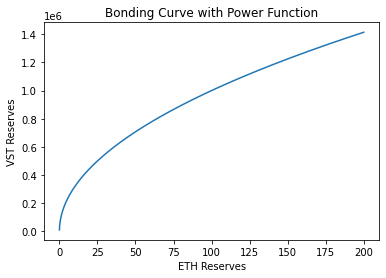

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x_reserve = 100
y_reserve = 160000
m = 100000

a = 0.5  # Change this value to adjust the curvature of the curve

x_values = np.linspace(0.01, x_reserve * 2, 1000)
y_values = m * (x_values ** a)

fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.set_xlabel('ETH Reserves')
ax.set_ylabel('VST Reserves')
ax.set_title('Bonding Curve with Power Function')

# Choose 5 x and y values
points = [100, 300, 500, 700, 900]
x_points = x_values[points]
y_points = y_values[points]


plt.show()


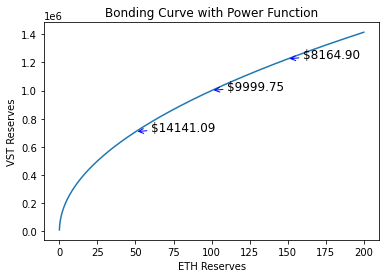

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x_reserve = 100
y_reserve = 160000
m = 100000

a = 0.5  # Change this value to adjust the curvature of the curve

x_values = np.linspace(0.01, x_reserve * 2, 1000)
y_values = m * (x_values ** a)

fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.set_xlabel('ETH Reserves')
ax.set_ylabel('VST Reserves')
ax.set_title('Bonding Curve with Power Function')

# Calculate ETH prices at different percentiles of x_values and y_values
eth_prices = y_values / x_values
price_percentiles = [np.percentile(eth_prices, p) for p in [25, 50, 75]]

# Annotate the plot with the ETH prices at the corresponding points
for p in price_percentiles:
    index = np.abs(eth_prices - p).argmin()
    x_point = x_values[index]
    y_point = y_values[index]
    ax.annotate(f"${p:.2f}", xy=(x_point, y_point), xytext=(x_point+10, y_point+5000), fontsize=12,
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue'))

plt.show()


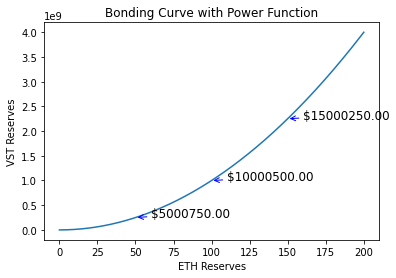

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x_reserve = 100
y_reserve = 160000
m = 100000

a = 2  # Change this value to adjust the curvature of the curve

x_values = np.linspace(0.01, x_reserve * 2, 1000)
y_values = m * (x_values ** a)

fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.set_xlabel('ETH Reserves')
ax.set_ylabel('VST Reserves')
ax.set_title('Bonding Curve with Power Function')

# Calculate ETH prices at different percentiles of x_values and y_values
eth_prices = y_values / x_values
price_percentiles = [np.percentile(eth_prices, p) for p in [25, 50, 75]]

# Annotate the plot with the ETH prices at the corresponding points
for p in price_percentiles:
    index = np.abs(eth_prices - p).argmin()
    x_point = x_values[index]
    y_point = y_values[index]
    ax.annotate(f"${p:.2f}", xy=(x_point, y_point), xytext=(x_point+10, y_point+5000), fontsize=12,
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue'))

plt.show()


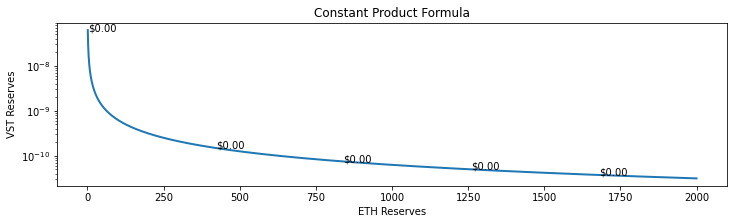

In [74]:
# Set initial reserves
x_reserve = 100  # initial reserve of token x (ETH)
y_reserve = 160000  # initial reserve of token y (VST)
a = 500 # constant

# Compute k value
k = (x_reserve)**2 * (y_reserve)**2

# Generate values for token x (ETH) between 1 and 2000
x_values = np.linspace(1, 2000, num=5000)

# Compute corresponding token y (VST) values using the constant product formula
y_values = k**(-1/2) / x_values

# Compute ETH price at each x value
eth_prices = y_values / x_values

# Plot the curve using a log scale on the y-axis
fig, ax = plt.subplots(figsize=(12, 3))
ax.set_yscale('log')
# plt.yscale('symlog')
ax.plot(x_values, y_values, linewidth=2)

# Highlight the starting price in red
# starting_price = (y_reserve - a) / (x_reserve - a)
# ax.scatter(x_reserve-a, y_reserve-a, s=60, color='red')

# Annotate the starting price on the plot
# ax.annotate(f'${starting_price:.2f}', ((x_reserve-a) * 1.05, (y_reserve-a) * 0.95))

# Annotate ETH prices at regular intervals along the curve
for i, x in enumerate(x_values[::1000]):
    eth_price = y_values[::1000][i] / x
    ax.annotate(f'${eth_price:.2f}', (x * 1.05, y_values[::1000][i] * 0.95))

# Add labels and title
ax.set_xlabel('ETH Reserves')
ax.set_ylabel('VST Reserves')
ax.set_title('Constant Product Formula')

# Show the plot
plt.show()

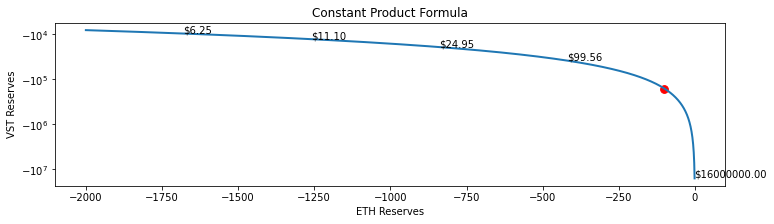

In [35]:
# Set initial reserves
x_reserve = 100  # initial reserve of token x (ETH)
y_reserve = 160000  # initial reserve of token y (VST)

# Compute k value
k = x_reserve * y_reserve

# Generate values for token x (ETH) between 1 and 2000
x_values = np.linspace(1, 2000, num=5000) * -1

# Compute corresponding token y (VST) values using the constant product formula
y_values = k / x_values

# Compute ETH price at each x value
eth_prices = y_values / x_values

# Plot the curve using a log scale on the y-axis
fig, ax = plt.subplots(figsize=(12, 3))
ax.set_yscale('log')
plt.yscale('symlog')
ax.plot(x_values, y_values, linewidth=2)

# Highlight the starting price in red
starting_price = y_reserve / x_reserve
ax.scatter(-x_reserve, -y_reserve, s=60, color='red')

# Annotate the starting price on the plot
ax.annotate(f'${starting_price:.2f}', (x_reserve * 1.05, y_reserve * 0.95))

# Annotate ETH prices at regular intervals along the curve
for i, x in enumerate(x_values[::1000]):
    eth_price = y_values[::1000][i] / x
    ax.annotate(f'${eth_price:.2f}', (x * 1.05, y_values[::1000][i] * 0.95))

# Add labels and title
ax.set_xlabel('ETH Reserves')
ax.set_ylabel('VST Reserves')
ax.set_title('Constant Product Formula')

# Show the plot
plt.show()

This appears to do what we need. As the price increases, ETH reserves increase and VST reserves decrease. Conversely, as the prices decreases, ETH reserves decrease while VST reserves increase. However, it doesn't make sense to start with negative reserves of assets.

Let's experiment with some transforms.

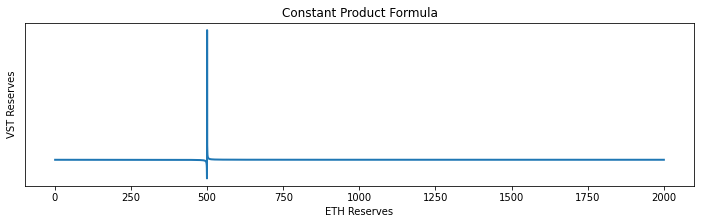

In [72]:
# Set initial reserves
x_reserve = 100  # initial reserve of token x (ETH)
y_reserve = 160000  # initial reserve of token y (VST)
a = 500 # constant

# Compute k value
k = (x_reserve - a)**2 * (y_reserve - a)**2

# Generate values for token x (ETH) between 1 and 2000
x_values = np.linspace(1, 2000, num=5000)

# Compute corresponding token y (VST) values using the constant product formula
y_values = k**(-1/2) / (x_values - a) + a

# Compute ETH price at each x value
eth_prices = y_values / x_values

# Plot the curve using a log scale on the y-axis
fig, ax = plt.subplots(figsize=(12, 3))
ax.set_yscale('log')
plt.yscale('symlog')
ax.plot(x_values, y_values, linewidth=2)

# Highlight the starting price in red
# starting_price = (y_reserve - a) / (x_reserve - a)
# ax.scatter(x_reserve-a, y_reserve-a, s=60, color='red')

# Annotate the starting price on the plot
# ax.annotate(f'${starting_price:.2f}', ((x_reserve-a) * 1.05, (y_reserve-a) * 0.95))

# Annotate ETH prices at regular intervals along the curve
for i, x in enumerate(x_values[::1000]):
    eth_price = y_values[::1000][i] / x
    ax.annotate(f'${eth_price:.2f}', (x * 1.05, y_values[::1000][i] * 0.95))

# Add labels and title
ax.set_xlabel('ETH Reserves')
ax.set_ylabel('VST Reserves')
ax.set_title('Constant Product Formula')

# Show the plot
plt.show()